# 참고 자료
https://wikidocs.net/32829<br>
https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/<br>
http://taewan.kim/post/numpy_sum_axis/<br>
https://rfriend.tistory.com/tag/np.swapaxes%28a%29

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import Image

# ▣ Pandas
판다스(Pandas)는 파이썬 **데이터 처리**를 위한 라이브러리입니다.<br>
파이썬을 이용한 **데이터 분석**과 같은 작업에서 필수 라이브러리

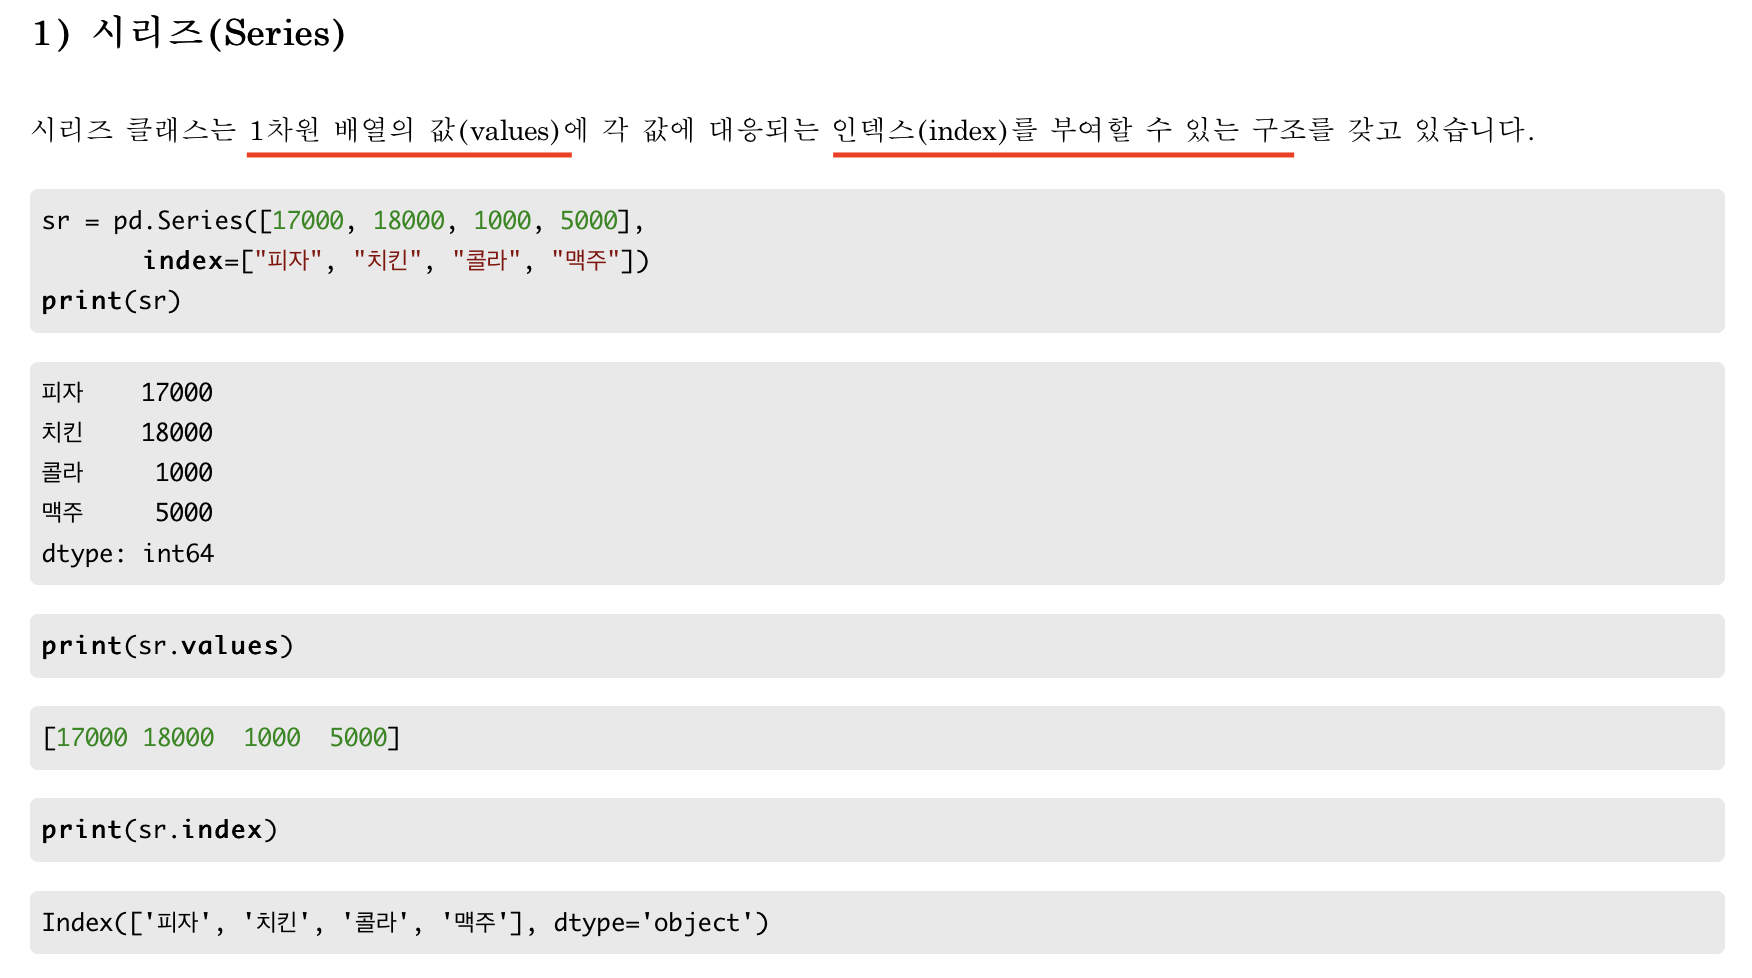

In [4]:
# Series 개념
Image("Image/pandas_series.png")

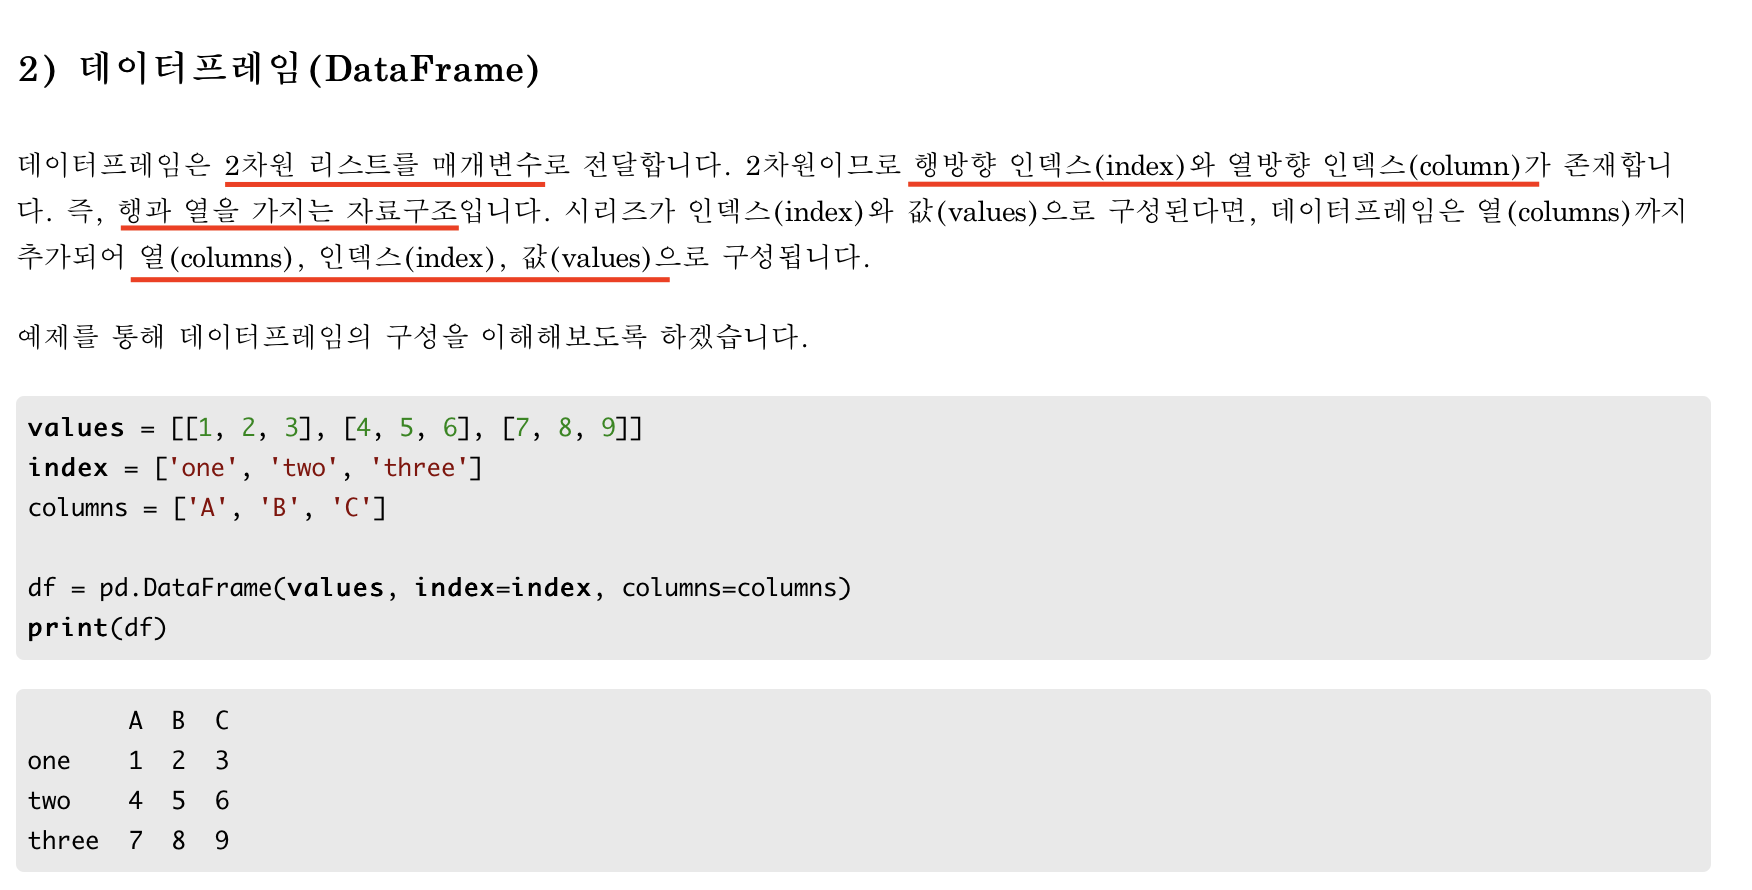

In [91]:
# DataFrame 개념
Image("Image/pandas_dataframe.png")

In [102]:
values = [[1,2,3],[4,5,6],[7,8,9]]
index = ['one','two','three']
columns = ['A','B','C']

df = pd.DataFrame(values,index,columns)
print(df.values)
print(df.index)
print(df.columns)
print(df.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Index(['one', 'two', 'three'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
(3, 3)


In [93]:
df.index = ["first","second","third"]
df.columns = ['1','2','3']
df

,1,2,3
first,1,2,3
second,4,5,6
third,7,8,9


# 3) 데이터프레임의 생성


데이터프레임은 리스트(List), 시리즈(Series), 딕셔너리(dict), Numpy의 ndarrays, 또 다른 데이터프레임으로 생성할 수 있습니다. 여기서는 리스트와 딕셔너리를 통해서 데이터프레임을 생성 해보겠습니다.

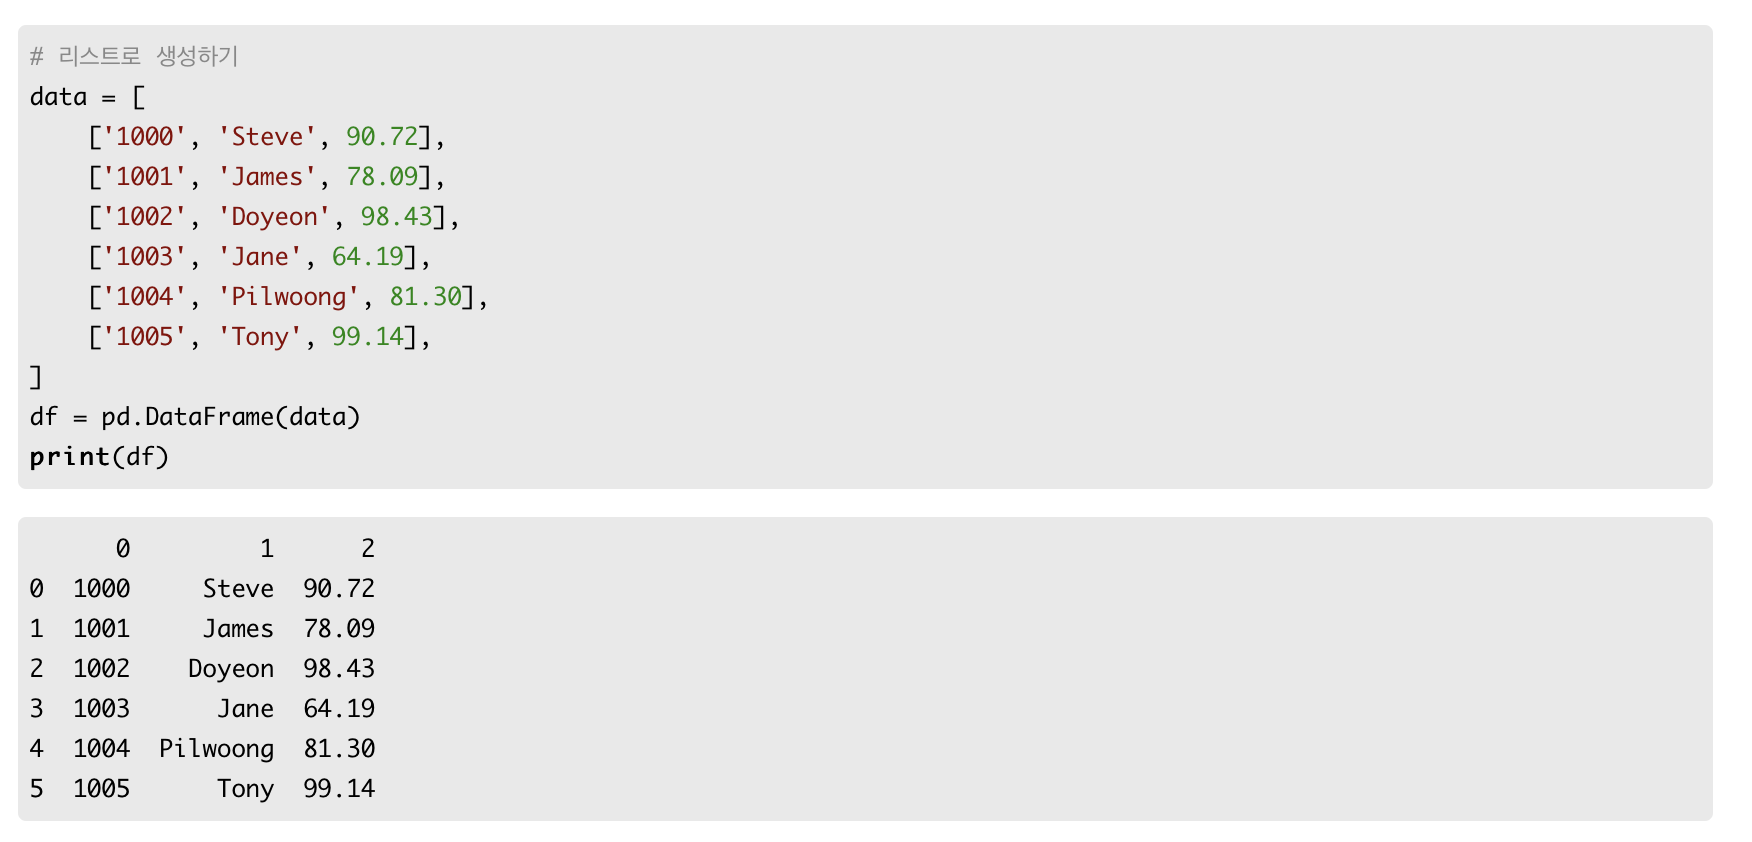

In [94]:
# - List로 생성 - 
Image("Image/pandas_dataframe_list.png")

In [4]:
# - Dictionary로 생성 - 
data = {
    '학번':['1000','2000','3000','4000','5000'],
    '이름':["창민","영준","진우","인영","진표"],
    '점수':[90,80,70,60,50]}

df = pd.DataFrame(data)
df

,학번,이름,점수
0,1000,창민,90
1,2000,영준,80
2,3000,진우,70
3,4000,인영,60
4,5000,진표,50


# 4) 데이터프레임 조회하기

아래의 명령어는 데이터프레임에서 원하는 구간만 확인하기 위한 명령어로서 유용하게 사용됩니다.

df.head(n) - 앞 부분을 n개만 보기
df.tail(n) - 뒷 부분을 n개만 보기
df['열이름'] - 해당되는 열을 확인



In [96]:
df.head(3)

,학번,이름,점수
0,1000,창민,90
1,2000,영준,80
2,3000,진우,70


In [97]:
df.tail(2)

,학번,이름,점수
3,4000,인영,60
4,5000,진표,50


In [98]:
df['이름']

0    창민
1    영준
2    진우
3    인영
4    진표
Name: 이름, dtype: object

# 4.1) 숫자형 특성의 요약 정보 출력(describe( ))

count : null을 제외한 행의 갯수<br>
mean  : 전체 평균<br>
min   : 최소값<br>
max   : 최대값<br>
std   : 표준편차(퍼져 있는 정도)<br>
%.    : 백분율이 속하는 하위 부분의 값<br>

In [6]:
df.describe()

,점수
count,5.000000
mean,70.000000
std,15.811388
min,50.000000
25%,60.000000
50%,70.000000
75%,80.000000
max,90.000000


# 4.2) 데이터프레임 정보 조회

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
학번    5 non-null object
이름    5 non-null object
점수    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


# 5) 외부 데이터 읽기

Pandas는 CSV, 텍스트, Excel, SQL, HTML, JSON 등 다양한 데이터 파일을 읽고 데이터 프레임을 생성할 수 있습니다.

예를 들어 ~~csv 파일을 읽을 때는 pandas.read_csv( )~~를 통해 읽을 수 있습니다.
다음과 같은 example.csv 파일이 있다고 합시다.

In [20]:
pd.read_csv("./csv_data/oecd_bli_2015.csv",thousands=",",encoding="latin1",na_values="n/a",delimiter=",").head(n=5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [15]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df_data = pd.read_csv(data_url,sep="\s+")
df_data.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


# read_csv 매개변수 

### 구분자 sep, delimiter : 구분자를 제거하고 출력(초기값으로 ','로 설정됨)
### thousands = ',' : 천 단위 자리수 구분 콤마 없애고 불러오기
### nrows = n : n 개의 행만 불러오기

# CSV로 저장하기 

In [4]:
import pandas as pd
data = [[1,2,3,4],[5,6,7,8]]
dataframe = pd.DataFrame(data)
dataframe.to_csv("/Users/changmin.kim/Desktop/jupyterNotebook/데이터 분석/resource/test.csv")

# 6) 히스토그램 그리기 

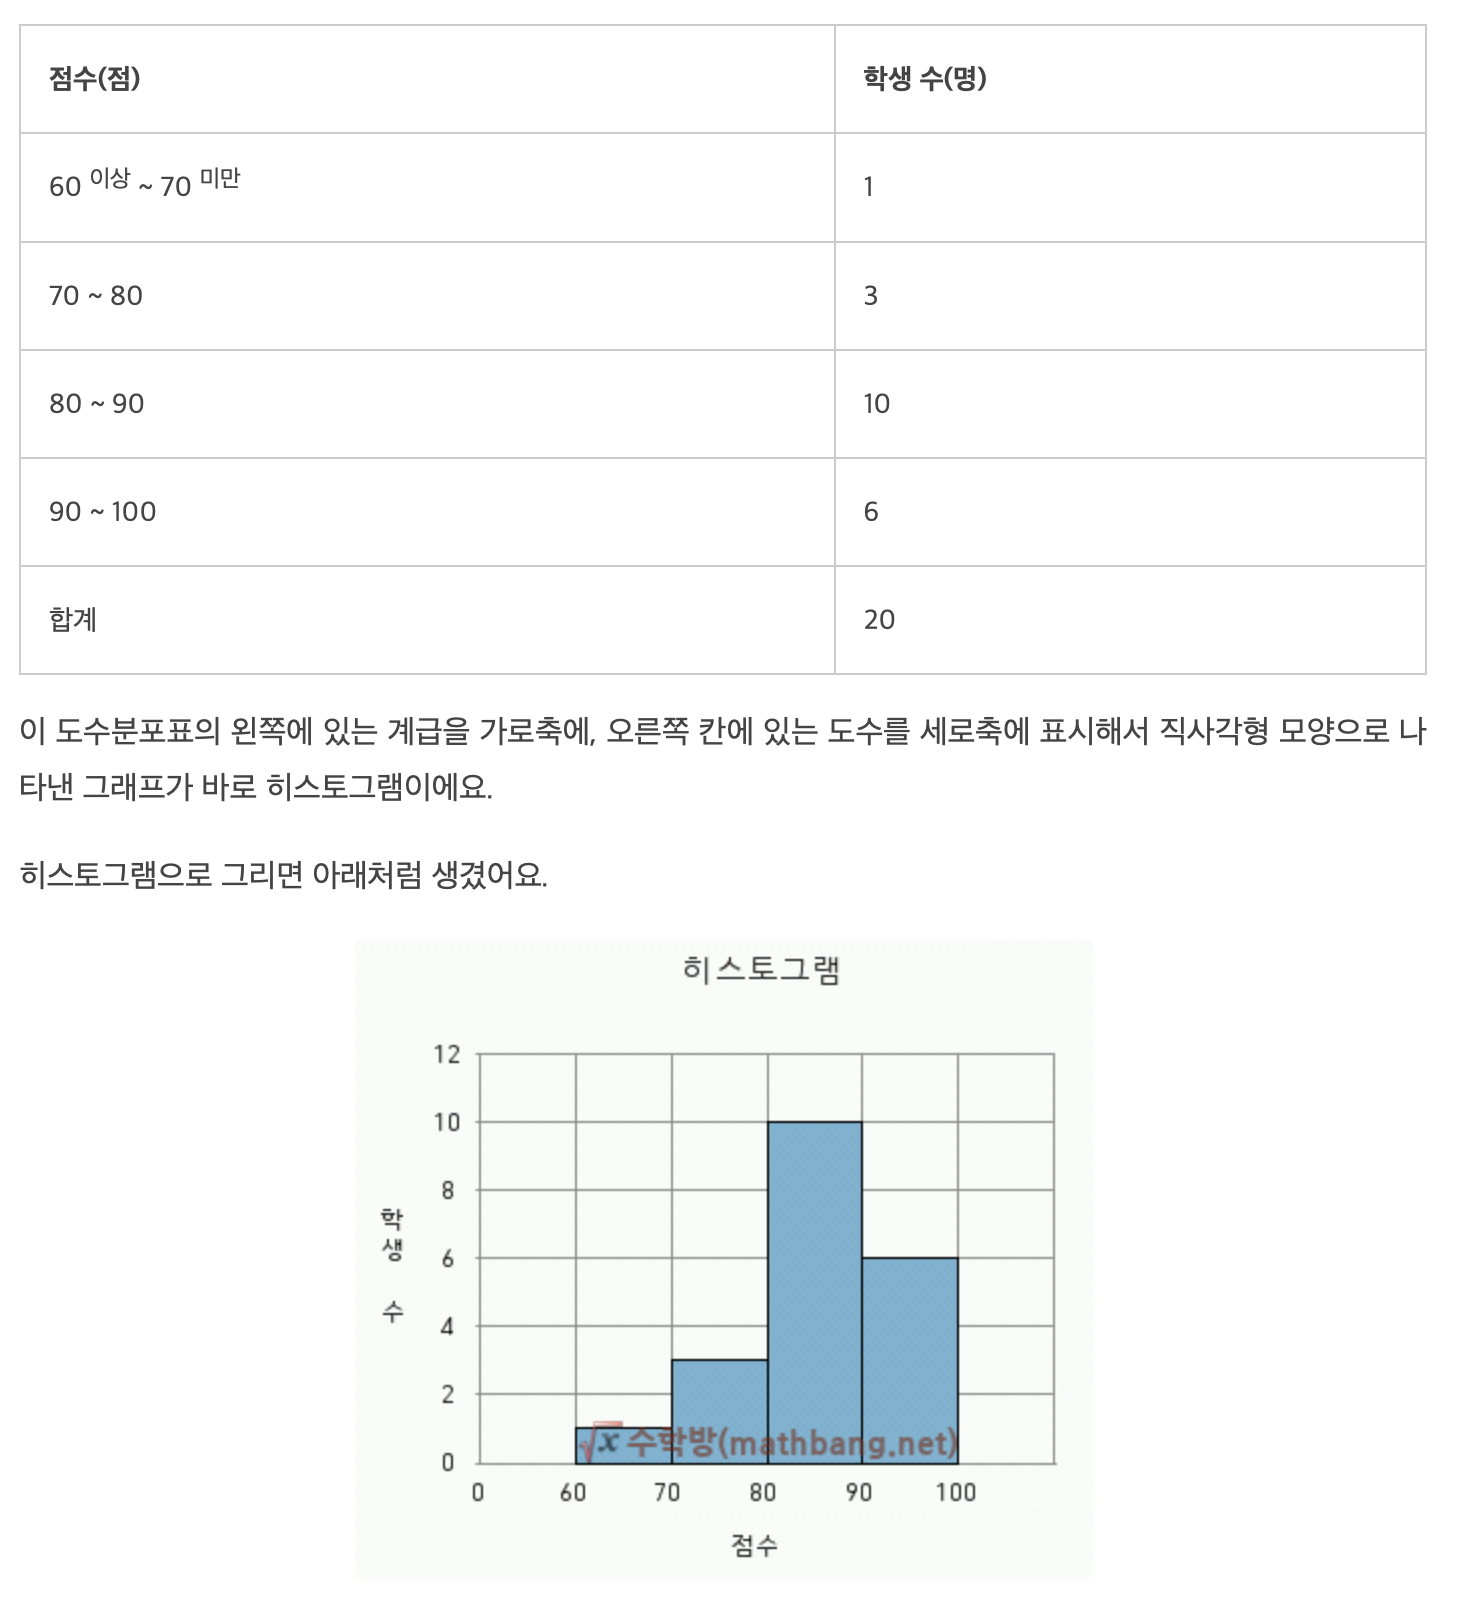

In [22]:
Image("Image/히스토그램.png",width=700)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124623d30>]],
      dtype=object)

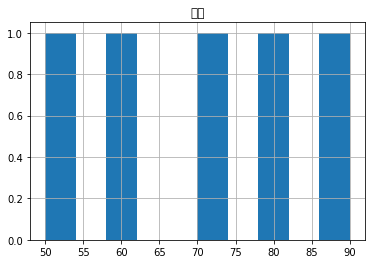

In [24]:
df.hist(bins=10)


# ▣ Numpy
넘파이(Numpy)는 **수치 데이터를 다루는 파이썬 패키지**입니다.<br>
Numpy의 핵심이라고 불리는 다차원 행렬 자료구조인 ndarray를 통해 **벡터 및 행렬을 사용하는 선형 대수 계산**에서 주로 사용됩니다.<br>
Numpy는 편의성뿐만 아니라, **속도면에서도 순수 파이썬에 비해 압도적으로 빠르다**는 장점이 있습니다.<br>
인공지능 관련 라이브러리는 거의 numpy과 관련되서 반환한다.

### np.shape : ndarray의 행 열 개수를 출력<br>
### np.size  : ndarray의 크기 출력<br>

In [103]:
ndarray = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

# 1) np.arange()

### np.arange()는 지정해준 범위에 대해서 배열을 생성합니다. 
np.array()의 범위 지정 방법은 다음과 같습니다.

numpy.arange(start, stop, step, dtype)
- start부터 stop-1까지 step씩 증가하는 dtype 타입의 배열.<br>

a = np.arange(n) # 0, ..., n-1까지 범위의 지정.<br>

In [121]:
print(np.arange(5,9,1),"\n")
print(np.arange(5))

[5 6 7 8] 

[0 1 2 3 4]


# 2) ndarray 초기화
zeros()는 해당 배열에 모두 0을 삽입합니다.<br>
ones()는 모두 1을 삽입합니다.<br>
full()은 배열에 사용자가 지정한 값을 넣는데 사용<br>
eye()는 대각선으로는 1이고 나머지는 0인 2차원 배열을 생성합니다.<br>

In [122]:
print(np.zeros([3,3]),"\n")
print(np.ones([3,3]),"\n")
print(np.full([3,3],7),"\n")
print(np.eye(3))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[7 7 7]
 [7 7 7]
 [7 7 7]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 3) ndarray 슬라이싱

In [124]:
ndarray

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [133]:
print(ndarray[:,:],"\n")
print(ndarray[:,2:],"\n")
print(ndarray[:2,:],"\n")
print(ndarray[2,3])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[ 3  4]
 [ 7  8]
 [11 12]] 

[[1 2 3 4]
 [5 6 7 8]] 

12


# 4) random

## 시드 설정하기
컴퓨터 프로그램에서 발생하는 무작위 수는 사실 엄격한 의미의 무작위 수가 아니다. 어떤 특정한 시작 숫자를 정해 주면 컴퓨터가 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성한다. 이런 시작 숫자를 시드(seed)라고 한다. 일단 생성된 난수는 다음번 난수 생성을 위한 시드값이 된다. 따라서 시드값은 한 번만 정해주면 된다.

시드는 보통 **현재 시각등을 이용하여 자동으로 정해**지지만 사람이 수동으로 설정할 수도 있다. **특정한 시드값이 사용되면 그 다음에 만들어지는 난수들은 모두 예측할 수 있다**.

In [ ]:
np.random.seed(500) # 시드 값 지정

## 난수 생성 모듈

np.random.randint : **균일분포**의 정수 난수 1개 생성<br>
np.random.rand : ~~0 ~ 1~~사이의 **균일 분포**에서 난수 matrix array 생성<br>
np.random.randn : **가우시안 표준 정규 분포(정규분포)**에서 난수 matrix array 생성<br>
np.random.uniform(min, max, N) : **균일분포**로 array 호출<br>
np.random.normal(평균, 편차, 개수) : **정규분포**로 array 호출<br>

In [11]:
np.random.randn(2,3)

array([[-1.03225822e-03,  1.67233773e-01, -1.33210901e-01],
       [ 1.02193612e+00, -1.47320409e+00,  7.41391073e-01]])

37


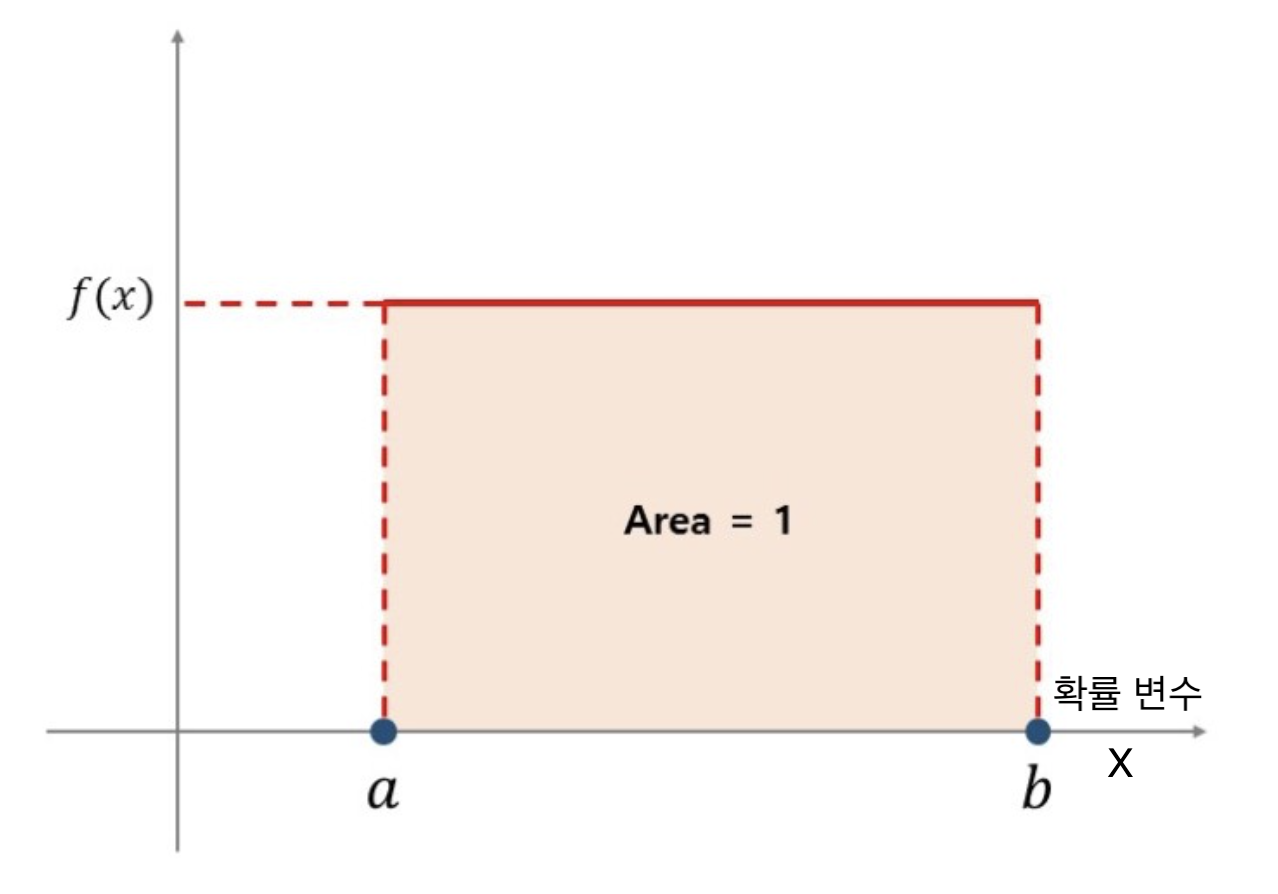

In [21]:
print(np.random.randint(99))
Image("Image/균일분포.png",width=700)

# 정규분포 난수 생성

In [62]:
np.random.normal(5,2,[2,5])

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

## 정규 분포 

In [25]:
x = np.linspace(-5, 5, 101)   # x 정의
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

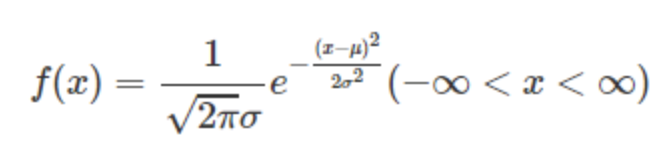

In [78]:
Image("Image/정규분포확률밀도함수.png")

In [79]:
y = (1 / np.sqrt(2 * np.pi)) * np.exp(- x ** 2 / 2 ) # 표준 정규 분포 

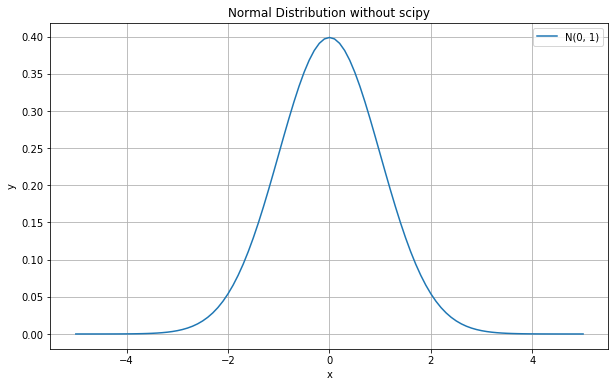

In [76]:
plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(x, y)                       
plt.xlabel("x")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")     # 타이틀 표시
plt.legend(["N(0, 1)"])              # 범례 표시
plt.show()                           # 플롯 보이기

## 무작위로 샘플(행 번호) 섞기

In [30]:
data = np.arange(0,50)
data[np.random.permutation(50)]

array([44,  7, 48, 49,  1, 21, 17, 30, 29, 45, 15, 10, 38, 20, 42, 46,  5,
       28, 47, 13, 34, 39, 18, 35, 36, 25, 40,  8,  6,  0, 32, 14, 41,  9,
       33, 24, 26, 31, 22, 12, 19,  3,  4, 37, 16, 23, 27, 43,  2, 11])

# 5) 배열 붙이기 

In [9]:
a = np.array([[1],[2],[3]]) 
b = np.array([[4],[5],[6]])

print(np.c_[a,b].ndim,"\n") # column
print(np.r_[a,b],"\n") # right
print(np.r_[[a], [b]])

2 

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] 

[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


# 6) 차원 축소/확대

In [21]:
a = np.array([[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]])#[1,4,3] -> [4,3]
print(a.shape)

# 축소
print(np.squeeze(a).shape)

# 확대
print(np.reshape(a,[1,4,3]).shape) 
print(np.expand_dims(a,axis=1).shape)

(1, 4, 3)
(4, 3)
(1, 4, 3)
(1, 1, 4, 3)


# 7) 타입 변경

In [43]:
a = np.array([True,False,False,True,False])
print(a)
print(a.astype(int))
print(a.astype(float))
print(a.astype(str))

[ True False False  True False]
[1 0 0 1 0]
[1. 0. 0. 1. 0.]
['True' 'False' 'False' 'True' 'False']


# 8) np.sum 함수의 axis 이해

- axis는 사용할 배열의 차원 미만의 숫자만 사용할 수 있다.<br>
    ex) ndarray.size => 3 -> axis = 0 or 2

- 예시를 이용해 직접 작성해서 감각을 느껴라<br>
    ex) [2,8], [2,2,4], [2,2,2,2]<br>
    
- axis = -1 는 axis가 가질 수 있는 가장 큰(가장 안쪽) 값을 의미



In [40]:
arr = np.arange(0, 16)
arr = np.reshape(arr,[2,2,2,2])
print(arr)
np.sum(arr,axis=0)

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]


array([[[ 8, 10],
        [12, 14]],

       [[16, 18],
        [20, 22]]])

# 9) np.swapaxes
- 행렬의 행과 열 바꾸기 ex) g = (1,2,3,4)(4차원) swapaxes(g,0,3) -> (4,2,3,1)

# 10) numpy 배열을 여러개의 하위 배열로 분할하기(split)

In [8]:
x = np.arange(18).reshape(3, 6)
print(x)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]


In [12]:
print(np.split(x,3))
print("형태 :",np.shape(np.split(x,3)))

[array([[0, 1, 2, 3, 4, 5]]), array([[ 6,  7,  8,  9, 10, 11]]), array([[12, 13, 14, 15, 16, 17]])]
형태 : (3, 1, 6)


# 11) 차원 구하기
- ndim

# 12) 배열에서 특징있는 값만 추출 하기

In [4]:
x = np.array([1,2,3,1,1,12,3,3,5,6,7,77])
np.unique(x)

array([ 1,  2,  3,  5,  6,  7, 12, 77])

# 13) 다차원 배열을 1차 배열로 만들기
- ravel()

In [147]:
x = np.array([[[[[[[1,2,3,4,5,6,7]]]]]]])
print("차원수:",np.ndim(x))
x = x.ravel()
print("차원수:",np.ndim(x))

차원수: 7
차원수: 1


# A) 기타
### 타입 보기
a = np.array([5])<br>
print(a.dtype)<br>

### 타입 바꾸기 (astype)
a = np.array([5])<br>
a.astype(np.float32)<br>


In [2]:
print(np.array([[1,2,3]]).ndim)

2


# ▣ Matplotlib

Matplotlib은 데이터를 **차트(chart)나 플롯(plot)으로 시각화**(visulaization)하는 패키지<br>
데이터 분석에서 Matplotlib은 데이터 분석 이전에 데이터 이해를 위한 시각화나, 데이터 분석 후에 결과를 시각화하기 위해서 사용<br>

## Basic Attributes
___
**alpha**: 투명도
___
**kind** : 그래프 종류 'line', 'bar', 'barh', 'kde'
___
**logy** : Y축에 대해 Log scaling
___
**use_index** : 객체의 색인을 눈금 이름으로 사용할지 여부
___
**rot** : 눈금 이름 돌리기 (rotating) 0 ~ 360
___
**xticks, yticks** : x, y축으로 사용할 값
___
**xlim, ylim** : X, Y축의 한계
___
**grid** : 축의 그리드를 표현할지 여부
___
**subplots** : 각 column에 독립된 subplot 그리기
___
**sharex, sharey** : subplots=True 이면 같은 X,Y축을 공유하고 눈금과 한계를 연결
___
**figsize** : 생성될 그래프의 크기를 tuple로 지정
___

# 라인 플롯 그리기
plot( [x, y] )은 라인 플롯을 그리는 기능을 수행.<br>
plot() X축과 Y축의 값을 기재함.<br>
show() : 그림을 표시하는 시각화 함수.<br>

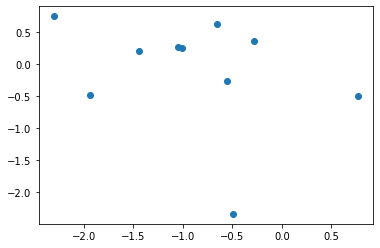

In [41]:
plt.plot(np.random.normal(size=[10]),np.random.normal(size=[10]),"o")

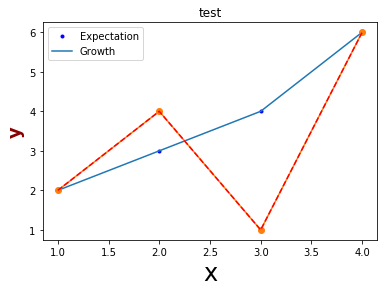

In [22]:
font1 = {'size': 24, 'color':  'black'}
font2 = {'size': 18, 'weight': 'bold', 'color':  'darkred'}
plt.title("test")

plt.plot([1,2,3,4],[2,3,4,6],'b.')
plt.plot([1,2,3,4],[2,3,4,6])
plt.plot([1,2,3,4],[2,4,1,6],"o-") # r : red, b : blue, g : green, y : yellow, o : orange
plt.plot([1,2,3,4],[2,4,1,6],"r--")
plt.xlabel("x",fontdict=font1)
plt.ylabel("y",fontdict=font2)
plt.legend(["Expectation","Growth"]) # legned : (지도.도표등의)범례
plt.show()

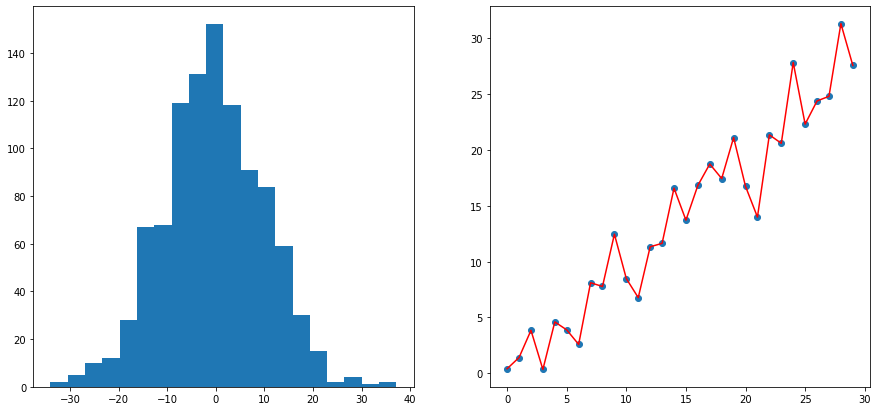

In [117]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(np.random.normal(size=1000,scale=10),bins=20)
plt.subplot(1,2,2)
a = np.arange(30)
b = np.arange(30)+3*np.random.randn(30)
plt.scatter(a,b)
plt.plot(a,b,'r')
plt.show()
plt.close()

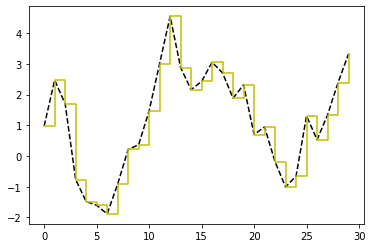

In [121]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--')
plt.plot(data,'y-',drawstyle='steps-post')
plt.show()

# 그래프 이미지로 저장
- show()을 먼저 쓰면 저장 안됨

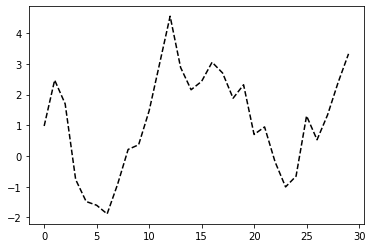

In [126]:
plt.plot(data,'k--')
plt.savefig('flg2.png',dpi=300)
plt.show()
plt.close()

### 마커

데이터 위치를 나타내는 기호를 마커(marker)라고 한다. 마커의 종류는 다음과 같다.

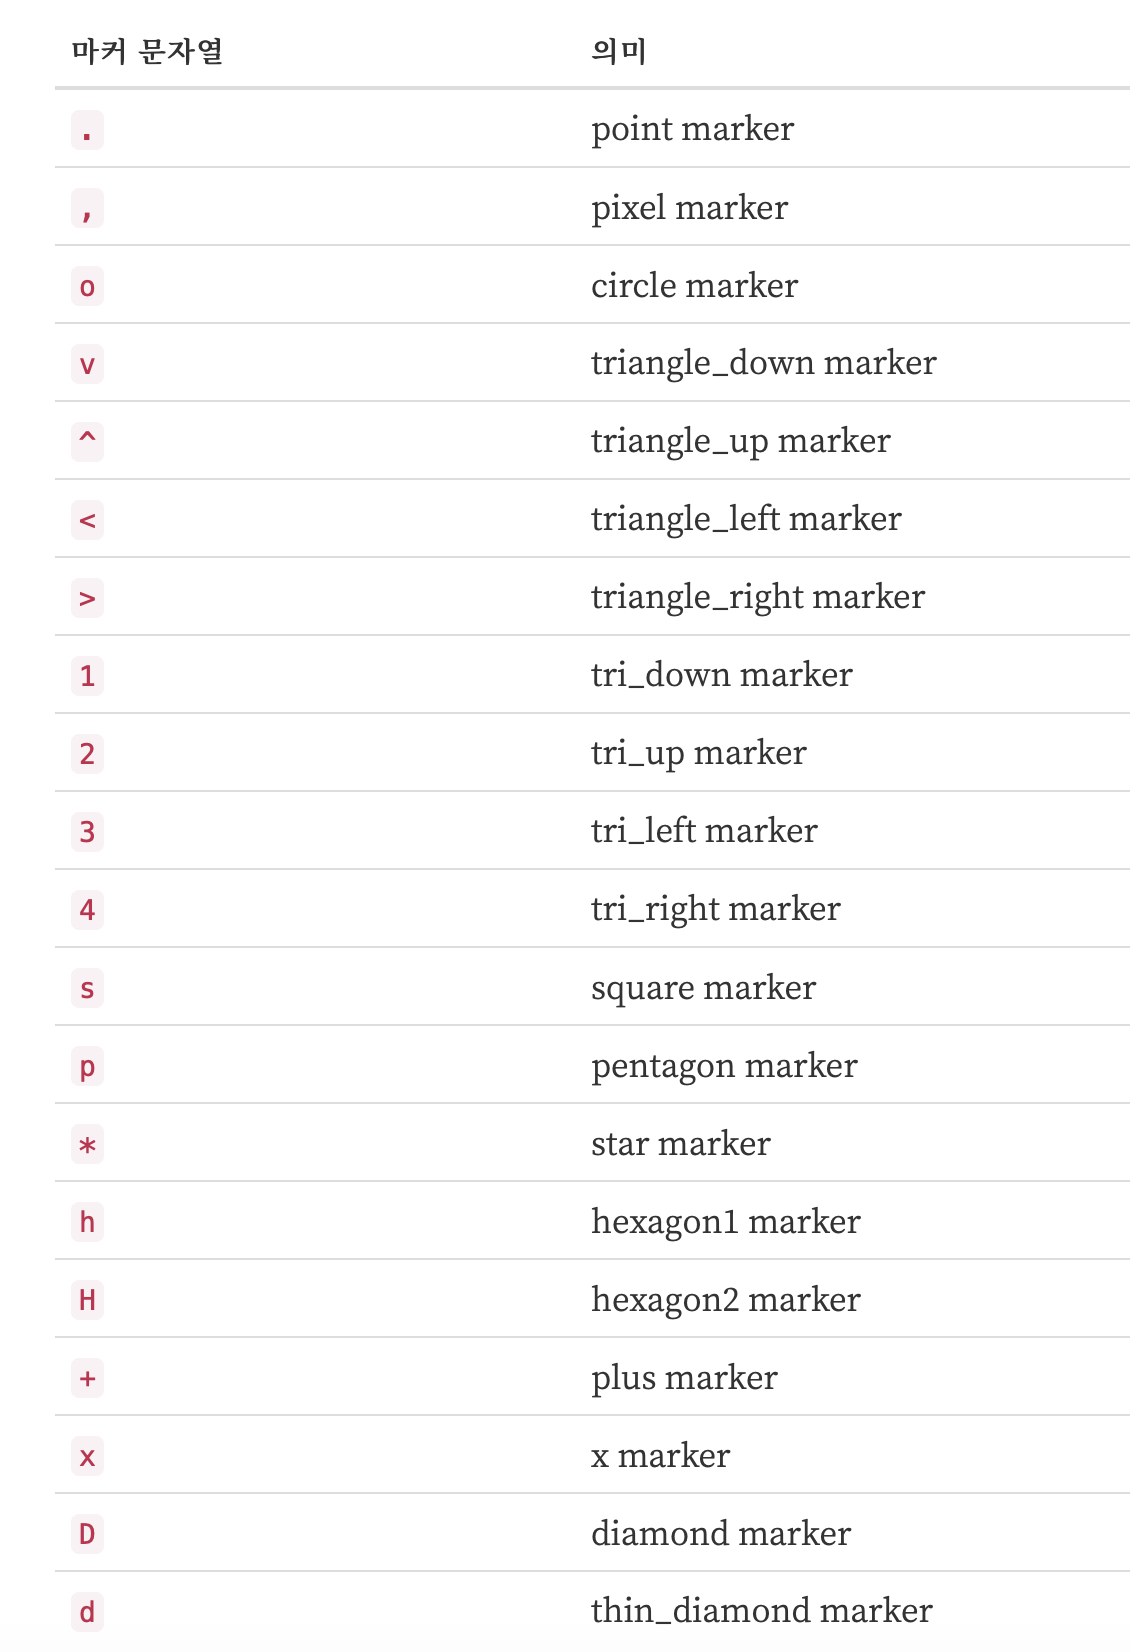

In [11]:
Image("Image/마커.png",width=700)

### 선 스타일

선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit) 이 있다. 지정 문자열은 다음과 같다.

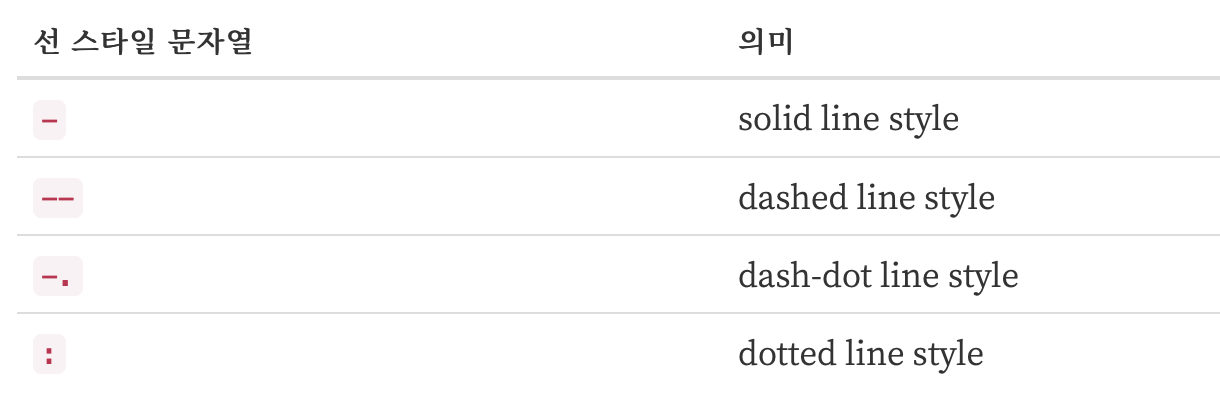

In [14]:
Image("Image/선스타일.png",width=700)

# 이미지 출력

- 이미지를 배열단위로 처리해 저장

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


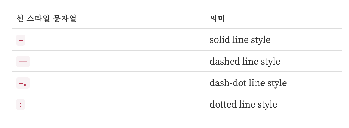

In [3]:
import matplotlib.image as img
ndarray = img.imread("Image/선스타일.png")
print(ndarray)
plt.axis("off")
plt.imshow(ndarray,cmap=mpl.cm.binary,interpolation="nearest")
plt.show()

In [ ]:
plt.subplot()

# 이미지 파일 열기

In [ ]:
from PIL import Image as pythonImage

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


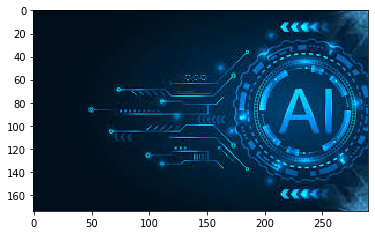

In [158]:
path = "/Users/changmin.kim/Desktop/jupyterNotebook/AI.jpeg"
image = pythonImage.open(path)
print(type(image))
image = np.array(image)
print(type(image))
plt.imshow(image)
plt.show()

## 흑백으로 열기 

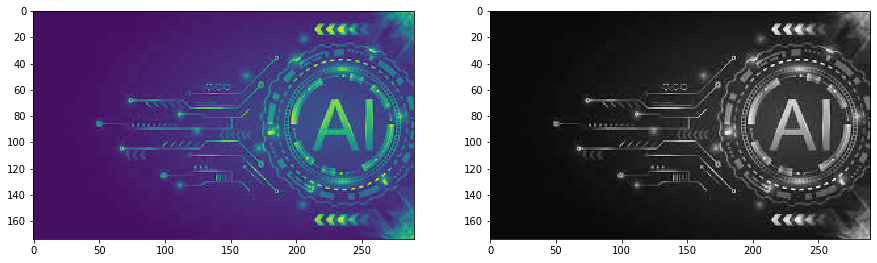

In [157]:
image = pythonImage.open(path).convert("L")
image = np.array(image)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(image,'gray')
plt.show()

**color map 참조**
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

![](https://matplotlib.org/3.1.0/_images/sphx_glr_colormaps_004.png)

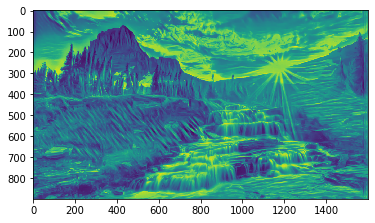

In [192]:
image = pythonImage.open("/Users/changmin.kim/Desktop/jupyterNotebook/background.jpg").convert('L')
image = np.array(image)
plt.imshow(image)
plt.show()

열 감지 색
값이 높을 수록 빨간색으로 낮을수록 파란색으로 출력


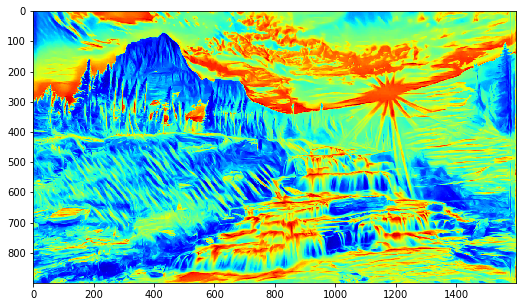

In [198]:
print("열 감지 색")
print("값이 높을 수록 빨간색으로 낮을수록 파란색으로 출력")
plt.figure(figsize=(10,5))
plt.imshow(image,'jet')
plt.show() 

## Colorbar 추가하기

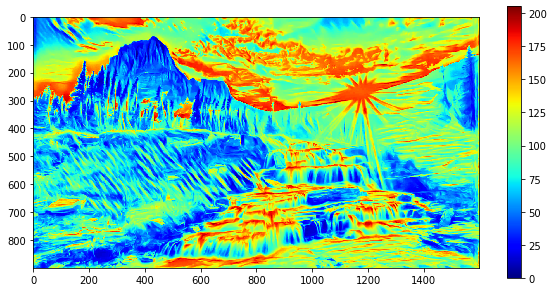

In [197]:
plt.figure(figsize=(10,5))
plt.imshow(image,'jet')
plt.colorbar()
plt.show() 